# Cross-validation | Sprint 4

Nossa comparação de modelos consistiu no método de k-fold cross-validation disponível na biblioteca Scikit Learn. Essa ferramenta calcula a média de R² com base em várias amostras de treino e teste. Nesse sentido, o dataset original é dividido em k conjuntos. Então, a cada iteração, k - 1 conjuntos são utilizados para treino, com o restante servindo de teste. Essa divisão muda a cada repetição, o que garante que todos os subconjuntos sejam teste pelo menos uma vez. Assim, diminui-se o risco de overfitting e tem-se uma visão mais assertiva da qualidade de um modelo, pois levamos em consideração mais de um treinamento.


No entanto, devido às limitações de tempo da Sprint 4 e as modificações necessárias na etapa de modelagem (leia-se, remoção de BBB e testes com random search), decidimos focar a comparação apenas no modelo principal para este projeto: o de Total Domicílios | Rat%. Nesse contexto, realizamos comparações para a Rodada 3 (nossa melhor rodada da Sprint 3), para a Rodada 6 (baseada na Rodada 6, mas sem BBB) e para a Rodada 7 (baseada na Rodada 6 com random search). Excluímos as outras porque elas não incluíam as features mais recentes e, portanto, tinham grande chance de estarem enviesadas. Desse modo, as Rodadas 6 e 7 atuam não como alternativas às outras, mas como aprimoramentos a elas, podendo substituí-las nas análises.


Como sempre, iniciamos importando as bibliotecas necessárias para manipular os arquivos:

In [2]:
import pandas as pd

## Rodada 3

Inicialmente, abrimos a planilha da rodada atual e separamos os dados em conjuntos de treino e teste.

In [3]:
# Abre a planilha
!gdown '1Y0UhnVUSRmZCunFPXZYvjbkfy_GyzlJs'
df = pd.read_csv('rodada_3.csv')

Downloading...
From: https://drive.google.com/uc?id=1Y0UhnVUSRmZCunFPXZYvjbkfy_GyzlJs
To: /content/rodada_3.csv
100% 36.8M/36.8M [00:00<00:00, 214MB/s]


In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_EDUCATIVO',
       'Categoria_ENTREVISTA', 'Categoria_ESPORTE', 'Categoria_FEMININO',
       'Categoria_FILME', 'Categoria_FUTEBOL', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MUSICAL', 'Categoria_NOVELA',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

Então, criamos um array para guardar os modelos que desejamos comparar, com seus parâmetros específicos. No caso, utilizamos os melhores argumentos de cada algoritmo da rodada 3.

In [ ]:
# Esta célula adiciona os modelos em um array

# Importa bibliotecas necessárias para cada algoritmo
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = []
# Adiciona tuplas com legenda e objeto de cada modelo
models.append(('Decision Tree (35)', DecisionTreeRegressor(max_depth=35) ))
models.append(('Random Forest (200)', RandomForestRegressor(n_estimators=200)))
models.append(('KNN (7)', KNeighborsRegressor(n_neighbors=7)))
models.append(('Linear regression', LinearRegression())) # Linear Regression não tem hiperparâmetros


Depois, fizemos o cross-validation em si e geramos um gráfico de barras dos resultados.

In [ ]:
# Importa bibliotecas de cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Array para guardar acurácias (R²)
acuracia = []
# Este loop testa cada modelo no cross-validation e printa os resultados
for sigla, modelo in models:
    #divisão em 10 subconjuntos 
    kfold = KFold(n_splits=10, random_state=7, shuffle=True) # Cria 10 subconjuntos misturados com semente 7
    resultado = cross_val_score(modelo, x, y, cv=kfold, n_jobs=-1) # Faz o cross-validation
    acuracia.append(resultado.mean()) # Salva a média dos resultados no array
    print("%s: %f (%f)" % (sigla, resultado.mean(), resultado.std())) # Printa média e desvio-padrão

Decision Tree (35): 0.960295 (0.001758)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Random Forest (200): 0.971594 (0.000792)
KNN (7): 0.814859 (0.002862)
Linear regression: 0.414827 (0.005880)


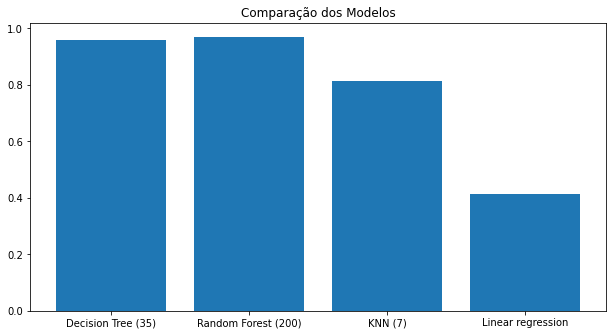

In [ ]:
# Importa biblioteca de gráficos
import matplotlib.pyplot as plt

# Especifica tamanho do gráfico
fig = plt.figure(figsize = (8,4))
# Especifica gradação do gráfico
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.set_title('Comparação de Modelos') # Titula gráfico
axes.bar([item[0] for item in models], acuracia) # Plota valores do array
plt.show() # Mostra gráfico

Em geral, são os resultados esperados com base nos desempenhos vistos em outras rodadas. Entre árvore decisória e floresta aleatória, com apenas 1 ponto percentual de diferença, damos preferência à árvore pela sua maior explicabilidade.

## Rodada 6

Fazemos o mesmo da rodada anterior para a rodada 6.

In [4]:
# Abre a planilha
!gdown '1ayV7FeLwOamJnQiq2WVrdGL5EMADYXup'
df = pd.read_csv('sem_bbb.csv')

Downloading...
From: https://drive.google.com/uc?id=1ayV7FeLwOamJnQiq2WVrdGL5EMADYXup
To: /content/sem_bbb.csv
100% 36.4M/36.4M [00:00<00:00, 85.8MB/s]


In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_EDUCATIVO',
       'Categoria_ENTREVISTA', 'Categoria_ESPORTE', 'Categoria_FEMININO',
       'Categoria_FILME', 'Categoria_FUTEBOL', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MUSICAL', 'Categoria_NOVELA',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Esta célula adiciona os modelos em um array

# Importa bibliotecas necessárias para cada algoritmo
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = []
# Adiciona tuplas com legenda e objeto de cada modelo
models.append(('Regressão Linear', LinearRegression()))
models.append(('KNN (7)', KNeighborsRegressor(n_neighbors=7)))
models.append(('Decision Tree (40)', DecisionTreeRegressor(max_depth=40)))
models.append(('Random Forest (200)', RandomForestRegressor(n_estimators=200))) # Linear Regression não tem hiperparâmetros

In [ ]:
# Importa bibliotecas de cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Array para guardar acurácias (R²)
acuracia = []
# Este loop testa cada modelo no cross-validation e printa os resultados
for sigla, modelo in models:
    #divisão em 10 subconjuntos 
    kfold = KFold(n_splits=10, random_state=7, shuffle=True) # Cria 10 subconjuntos misturados com semente 7
    resultado = cross_val_score(modelo, x, y, cv=kfold, n_jobs=-1) # Faz o cross-validation
    acuracia.append(resultado.mean()) # Salva a média dos resultados no array
    print("%s: %f (%f)" % (sigla, resultado.mean(), resultado.std())) # Printa média e desvio-padrão

Regressão Linear: 0.414576 (0.003483)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KNN (7): 0.801285 (0.001136)
Decision Tree (40): 0.935497 (0.003758)
Random Forest (200): 0.957380 (0.000875)


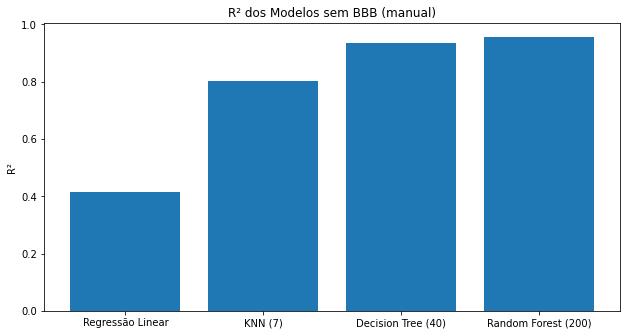

In [ ]:
# Importa biblioteca de gráficos
import matplotlib.pyplot as plt

# Especifica tamanho do gráfico
fig = plt.figure(figsize = (8,4))
# Especifica gradação do gráfico
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.set_title('R² dos Modelos sem BBB (manual)') # Titula gráfico
axes.bar([item[0] for item in models], acuracia) # Plota valores do array
plt.show() # Mostra gráfico

Similarmente à rodada 3, a versão sem BBB oferece como melhor resultado o random forest e, como pior, a regressão linear. Os valores em si de R² não diferem muito, ficando acima dos 90% e em torno de 40%, respectivamente. Ainda assim, o padrão de se ter o decision tree em níveis comparáveis persiste, chegando a mais de 90% de R² com 40 de profundidade. Considerando a explicabilidade, é o melhor modelo, sem contar o fato de rodar mais rapidamente do que o random forest.

## Rodada 7

Repetimos o mesmo processo para a rodada 7:

In [5]:
# Abre a planilha
df = pd.read_csv('sem_bbb.csv')

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_EDUCATIVO',
       'Categoria_ENTREVISTA', 'Categoria_ESPORTE', 'Categoria_FEMININO',
       'Categoria_FILME', 'Categoria_FUTEBOL', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MUSICAL', 'Categoria_NOVELA',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Esta célula adiciona os modelos em um array

# Importa bibliotecas necessárias para cada algoritmo
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = []
# Adiciona tuplas com legenda e objeto de cada modelo
models.append(('KNN (7)', KNeighborsRegressor(n_neighbors=7)))
models.append(('Decision Tree (28)', DecisionTreeRegressor(max_depth=28)))
models.append(('Random Forest (166)', RandomForestRegressor(n_estimators=166)))

In [ ]:
# Importa bibliotecas de cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Array para guardar acurácias (R²)
acuracia = []
# Este loop testa cada modelo no cross-validation e printa os resultados
for sigla, modelo in models:
    #divisão em 10 subconjuntos 
    kfold = KFold(n_splits=10, random_state=7, shuffle=True) # Cria 10 subconjuntos misturados com semente 7
    resultado = cross_val_score(modelo, x, y, cv=kfold, n_jobs=-1) # Faz o cross-validation
    acuracia.append(resultado.mean()) # Salva a média dos resultados no array
    print("%s: %f (%f)" % (sigla, resultado.mean(), resultado.std())) # Printa média e desvio-padrão

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KNN (7): 0.801285 (0.001136)


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Decision Tree (28): 0.935978 (0.003671)
Random Forest (166): 0.957182 (0.000687)


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.2min finished


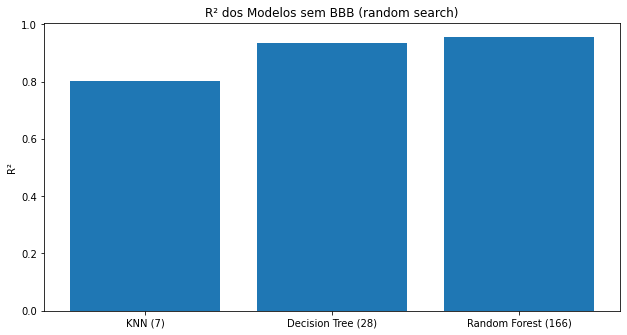

In [ ]:
# Importa biblioteca de gráficos
import matplotlib.pyplot as plt

# Especifica tamanho do gráfico
fig = plt.figure(figsize = (8,4))
# Especifica gradação do gráfico
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
axes.set_title('R² dos Modelos sem BBB (random search)') # Titula gráfico
axes.bar([item[0] for item in models], acuracia) # Plota valores do array
plt.show() # Mostra gráfico

A rodada 7 é a mais importante, pois otimiza parâmetros em nossa melhor seleção de features. Portanto, sabíamos já antes da comparação que nosso modelo escolhido viria desse conjunto. A decision tree consegue 93% de R², enquanto random forest chega a 95%. Essa diferença percentual é compensada, entretanto, pelo gráfico mais simples da árvore decisória juntamente de seu tempo de execução menor. Quanto ao KNN, apesar de muito bom, não oferece benefícios significativos o suficiente para justificar o R² de 80%.
